# 1. Import thư viện và tải dữ liệu

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import datetime
import math
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import plotly as py
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.graph_objs as go
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Hiểu dữ liệu

Yêu cầu 2: Hiển thị thông tin mô tả của bộ dữ liệu, bao gồm các giá trị như min, max, mean, std ...

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Yêu cầu 3: Trả lời các câu hỏi
Nhìn vào bảng mô tả phía trên, chúng ta có thể thấy cột Quantity và UnitPrice có xuất hiện giá trị âm, điều này là không hợp lý trừ khi sẽ có những giao dịch dạng trả hàng thì sẽ khiến hai cột này có giá trị âm. Mục tiêu của chúng ta là phân khúc hàng nên chúng ta sẽ cần loại bỏ những giá trị này (chỉ cần quan tâm những khách hàng mua hàng, những khách hàng trả hàng chúng ta không cần quan tâm đến).

Bạn cần trả lời các câu hỏi sau:

Kiểm tra xem có giao dịch nào có Quantity và UnitPrice đều nhỏ hơn 0 hay không:
Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:
ID các khách hàng ở trong các giao dịch ở ý trên là gì:
Tỷ lệ Quantity nhỏ hơn 0 trên tất cả các giao dịch là bao nhiêu:
Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng ký tự gì:

In [5]:
#Kiểm tra xem có giao dịch nào có Quantity và UnitPrice đều nhỏ hơn 0 hay không:
check_transations = df[(df['Quantity'] < 0) & (df['UnitPrice'] < 0)]
#In ra KQ
check_transations

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [5]:
#Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:
track_transactions = df[((df['Quantity'] < 0) & (df['UnitPrice'] == 0)) | ((df['Quantity'] == 0) & (df['UnitPrice'] < 0))]
#In ra KQ
track_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [6]:
#ID các khách hàng ở trong các giao dịch ở ý trên là gì:
df[(df['CustomerID']).isin(track_transactions)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [7]:
# Bước 1: Lọc các giao dịch có Quantity nhỏ hơn 0
negative_transactions = df[df['Quantity'] < 0]

# Bước 2: Đếm số lượng các giao dịch như vậy
num_negative_transactions = negative_transactions['InvoiceNo'].nunique()

# Bước 3: Lấy tổng số giao dịch
total_transactions = df['InvoiceNo'].nunique()

# Bước 4: Tính tỷ lệ phần trăm
percen_nagative_transactions = (num_negative_transactions / total_transactions) * 100

print(f"Tỷ lệ phần trăm của các giao dịch có Quantity nhỏ hơn 0 là: {percen_nagative_transactions:.2f}%")

Tỷ lệ phần trăm của các giao dịch có Quantity nhỏ hơn 0 là: 19.97%


In [8]:
# Lọc các giao dịch có số lượng âm
find_startwith = df[df['Quantity'] < 0]

# Lấy ký tự đầu tiên của số hóa đơn
found_startwith = find_startwith['InvoiceNo'].str[0]

# Hiển thị các ký tự đầu tiên và số lượng của chúng
startwith_counts = found_startwith.value_counts()

startwith_counts

C    9288
5    1336
Name: InvoiceNo, dtype: int64

## 3. Data preparation

Khi chúng ta đã tạo tập dữ liệu giá trị khách hàng của mình, chúng ta sẽ thực hiện một số bước tiền xử lý dữ liệu. Trong trường hợp này, chúng ta sẽ sử dụng thuật toán phân cụm K-mean. Một trong những yêu cầu để thuật toán hoạt động đúng cách là chuẩn hoá giá trị các biến tính năng. Căn giữa trung bình của một giá trị là việc thay thế giá trị thực của biến bằng một giá trị chuẩn hóa, để biến có giá trị trung bình là 0 và phương sai là 1. Điều này đảm bảo rằng tất cả các biến đều nằm trong cùng một phạm vi.

Trong các dữ liệu có biến Price hay giá tiền thì thường những biến này có giá trị rất lớn. Để giải quyết vấn đề này, chúng ta sẽ biến đổi tất cả các biến trên thang log. Việc chuyển đổi này, cùng với việc chuẩn hóa, sẽ đảm bảo rằng đầu vào cho thuật toán là một tập hợp các giá trị có cùng khoảng giá trị.

Một điểm quan trọng về bước tiền xử lý dữ liệu là đôi khi chúng ta cần nó có thể đảo ngược được. Trong trường ASM này, chúng ta sẽ có kết quả phân cụm của dữ liệu được biến đổi theo log. Nhưng để ánh xạ được về dữ liệu ban đầu, chúng ta sẽ cần phải chuyển đổi ngược lại tất cả các biến để chúng ta lấy lại các số liệu RFM (Recency, Frequency, Monetary) thực tế. Điều này có thể được thực hiện bằng cách sử dụng các hàm của Python.


# Yêu cầu 4: Thực hiện lần lượt các yêu cầu
Xoá tất cả các hàng có CustomerID là null
Xoá tất cả các hàng có Quantity < 0
Lấy các hàng có UnitPrice > 0

In [9]:
cs_df = df.copy()

In [11]:
#Xoá tất cả các hàng có CustomerID là null
cs_df.isnull().sum()
#Thực hiện xóa null của CustomerID
cs_df = cs_df.dropna(subset=['CustomerID'])
#Xoá tất cả các hàng có Quantity < 0
cs_df = cs_df[cs_df['Quantity'] >= 0]
#Lấy các hàng có UnitPrice > 0
cs_df = cs_df[cs_df['UnitPrice'] > 0]

In [13]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [14]:
#Định dạng trường InvoiceDate thành kiểu datetime
cs_df['InvoiceDate'] = pd.to_datetime(cs_df['InvoiceDate'])
#Định dạng CustomerID chuyển từ Float thành Int Type
cs_df['CustomerID'] = cs_df['CustomerID'].astype(int)
#Tính Amount 
cs_df['Amount'] = cs_df['Quantity'] * cs_df['UnitPrice']

In [15]:
cs_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
Amount                float64
dtype: object

In [16]:
cs_df['InvoiceDate'] = pd.to_datetime(cs_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
#------Tính Redency-------#
# Lấy ngày lớn nhất trong 'InvoiceDate' + 1
current_date = cs_df['InvoiceDate'].max() + datetime.timedelta(days=1)
# Tính toán ngày cuối cùng mỗi khách hàng mua hàng
last_purchase = cs_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
# Tạo biến 'Recency' là số ngày từ lần mua hàng cuối cùng đến ngày tham chiếu
last_purchase['Recency'] = (current_date - last_purchase['InvoiceDate']).dt.days
# Calculate descriptive statistics for 'CustomerID' and 'Recency'
recency_stats = last_purchase[['CustomerID', 'Recency']].describe().transpose()
# In ra thông tin mô tả của biến 'Redency'
recency_stats

,count,mean,std,min,25%,50%,75%,max
CustomerID,4338.0,15300.408022,1721.808492,12346.0,13813.25,15299.5,16778.75,18287.0
Recency,4338.0,92.536422,100.014169,1.0,18.00,51.0,142.00,374.0


# Yêu cầu 6. Trực quan hoá biến Recency bằng cách sử dụng Hàm QQ_plot

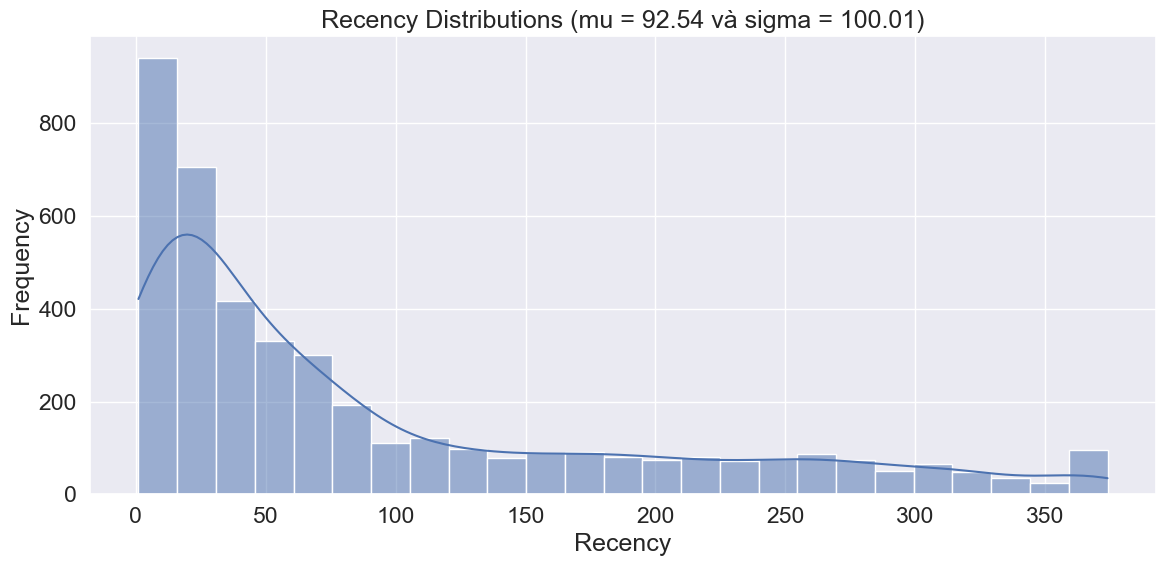

In [17]:
# Dữ liệu mẫu (thay thế bằng dữ liệu thực tế của bạn từ 'recency_data')
recency_data = last_purchase['Recency']

# Tạo các subplot (1 hàng, 1 cột)
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ đồ thị phân phối
sns.histplot(recency_data, kde=True, ax=ax)

# Tính toán trung bình và độ lệch chuẩn
mean_recency = recency_data.mean()
std_recency = recency_data.std()

# Đặt tiêu đề với giá trị trung bình và độ lệch chuẩn đã tính toán
ax.set_title(f'Recency Distributions (mu = {mean_recency:.2f} và sigma = {std_recency:.2f})')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

# Điều chỉnh bố cục và hiển thị đồ thị
plt.tight_layout()
plt.show()

# Yêu cầu 7: Tạo biến Frequency và in ra thông tin mô tả của biến Frequency vừa tạo
Các bạn sẽ tính Frequency bằng cách đếm số đơn hàng mà mỗi khách hàng đã thực hiện mua (Lưu ý là các đơn hàng sẽ dạng distinct)

In [26]:
import pandas as pd

# Giả sử cs_df và last_purchase đã được định nghĩa và chứa dữ liệu cần thiết

# Tính toán Frequency bằng cách đếm số đơn hàng duy nhất mà mỗi khách hàng đã thực hiện
Frequency = cs_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Gán Frequency vào DataFrame last_purchase
last_purchase['Frequency'] = last_purchase['CustomerID'].map(Frequency)

# Tính toán thống kê mô tả cho các biến CustomerID, Recency, và Frequency
recency_stats = last_purchase[['CustomerID', 'Recency', 'Frequency']].describe().transpose()

# Hiển thị các thống kê mô tả
recency_stats

,count,mean,std,min,25%,50%,75%,max
CustomerID,4338.0,15300.408022,1721.808492,12346.0,13813.25,15299.5,16778.75,18287.0
Recency,4338.0,92.536422,100.014169,1.0,18.0,51.0,142.0,374.0
Frequency,4338.0,4.272015,7.697998,1.0,1.0,2.0,5.0,209.0


# yêu cầu 8: Trực quan hoá Frequency với hàm QQ_plot

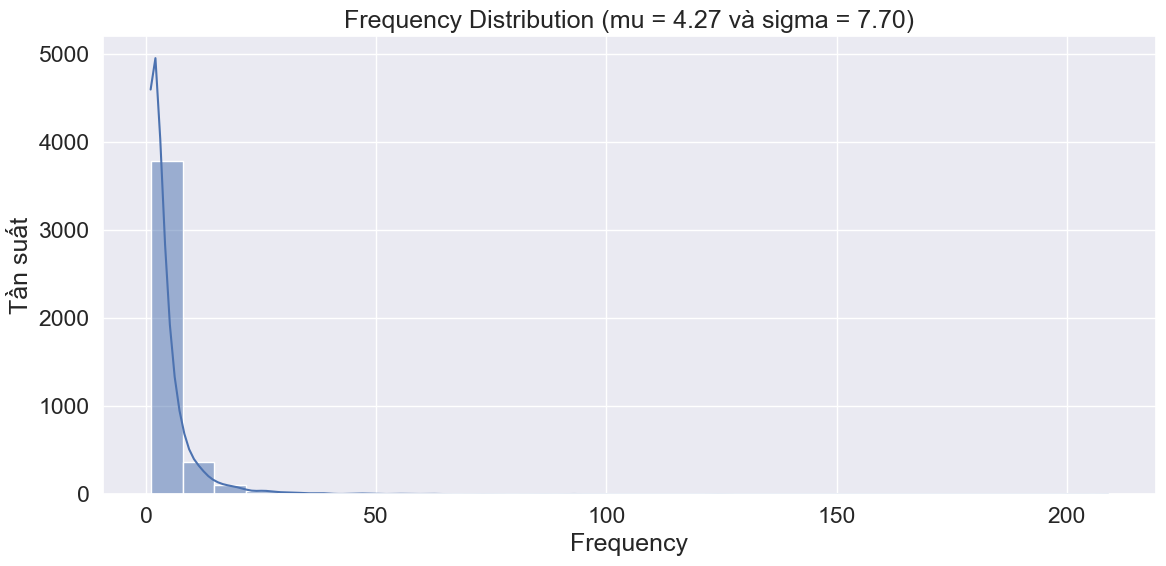

In [23]:
# Giả sử last_purchase đã được định nghĩa và chứa dữ liệu cần thiết
# Tính toán Frequency bằng cách đếm số đơn hàng duy nhất mà mỗi khách hàng đã thực hiện
Frequency = cs_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Gán Frequency vào DataFrame last_purchase
last_purchase['Frequency'] = last_purchase['CustomerID'].map(Frequency)

# Dữ liệu 
frequency_data = last_purchase['Frequency']

# Tạo một subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ phân phối cho Frequency
sns.histplot(frequency_data, kde=True, ax=ax, bins = 30)

# Tính toán trung bình và độ lệch chuẩn
mean_frequency = frequency_data.mean()
std_frequency = frequency_data.std()

# Đặt tiêu đề và nhãn trục cho đồ thị
ax.set_title(f'Frequency Distribution (mu = {mean_frequency:.2f} và sigma = {std_frequency:.2f})')
ax.set_xlabel('Frequency')
ax.set_ylabel('Tần suất')

# Điều chỉnh bố cục và hiển thị đồ thị
plt.tight_layout()
plt.show()

# yêu cầu 9: Tạo biến Monetary Value

In [24]:
# Tính toán Monetary bằng cách tính tổng số tiền cho mỗi CustomerID
Monetary = cs_df.groupby('CustomerID')['Amount'].sum()

# Gán giá trị Monetary vào DataFrame last_purchase
last_purchase['Amount'] = last_purchase['CustomerID'].map(Monetary)

# Tính toán thống kê mô tả cho các biến CustomerID, Recency, Frequency, và Amount
recency_stats = last_purchase[['CustomerID', 'Recency', 'Frequency', 'Amount']].describe()

# Hiển thị các thống kê mô tả
recency_stats

,CustomerID,Recency,Frequency,Amount
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


# Yêu cầu 10: Trực quan hoá Monetary Value với hàm QQ_plot

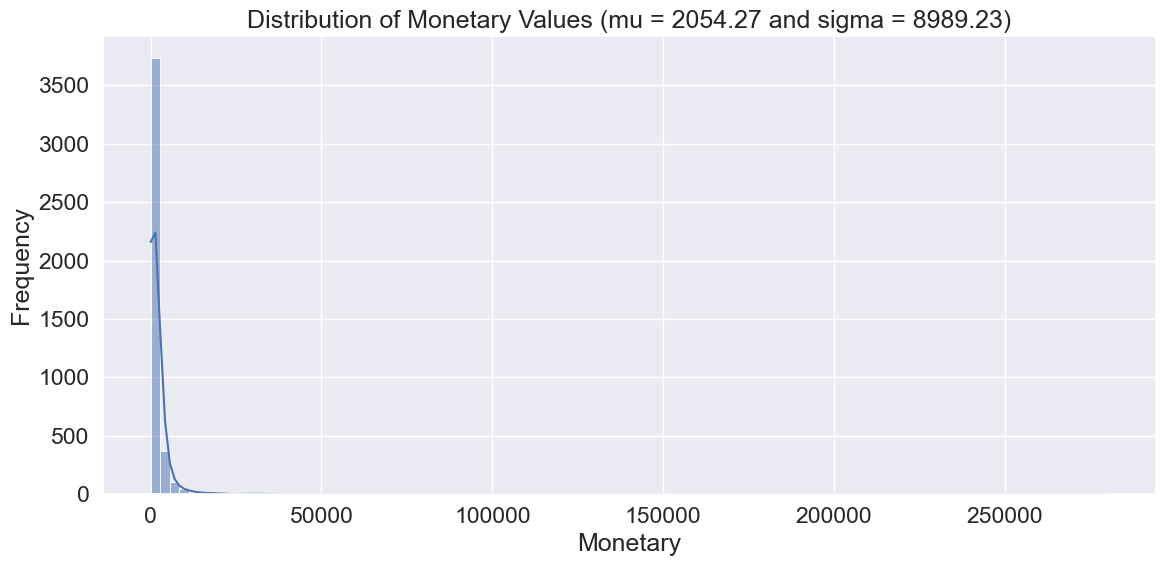

In [25]:
# Dữ liệu mẫu
Monetary_data = last_purchase['Amount']

# Tạo một subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ phân phối cho Monetary
sns.histplot(Monetary_data, kde=True, ax=ax, bins=100)

# Tính toán trung bình và độ lệch chuẩn
mean_monetary = Monetary_data.mean()
std_monetary = Monetary_data.std()

# Đặt tiêu đề và nhãn trục cho đồ thị
ax.set_title(f'Distribution of Monetary Values (mu = {mean_monetary:.2f} and sigma = {std_monetary:.2f})')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')

# Điều chỉnh bố cục và hiển thị đồ thị
plt.tight_layout()
plt.show()

# Yêu cầu 11: Hiển thị ra thông tin mô tả của cả ba biến recency, frequency, amount theo CustomerID

In [27]:
# Tính toán thống kê mô tả cho các biến CustomerID, Recency, Frequency, và Amount
recency_stats = last_purchase[['CustomerID', 'Recency', 'Frequency']].describe()

# Hiển thị các thống kê mô tả
recency_stats

,CustomerID,Recency,Frequency
count,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015
std,1721.808492,100.014169,7.697998
min,12346.000000,1.000000,1.000000
25%,13813.250000,18.000000,1.000000
50%,15299.500000,51.000000,2.000000
75%,16778.750000,142.000000,5.000000
max,18287.000000,374.000000,209.000000


In [28]:
customer_df = last_purchase[['Recency', 'Frequency', 'Amount']].describe()
customer_df

,Recency,Frequency,Amount
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


# Yêu cầu 12: Scale RBM trên thang đo log sau đó chuẩn hoá lại với StandardScaler

In [84]:
# Giả sử last_purchase là DataFrame chứa dữ liệu của bạn
# Tạo DataFrame chỉ với các biến cần thiết
data = last_purchase[['Recency', 'Frequency', 'Amount']]

# Bước 1: Chuyển đổi các giá trị thành logarithm
# Áp dụng logarithm cho từng giá trị trong DataFrame
data_log = data.applymap(lambda x: math.log(x) if x > 0 else float('nan'))

# Bước 2: Chuẩn hóa dữ liệu với StandardScaler
# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuyển đổi dữ liệu đã log thành numpy array để chuẩn hóa
data_scaled = scaler.fit_transform(data_log)

# Chuyển đổi kết quả trở lại DataFrame với cùng tên cột
customer_history_df = pd.DataFrame(data_scaled, columns=['Recency_log','Frequency_log', 'Amount_log'])

# In kết quả
customer_history_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency_log,4338.0,-1.048288e-16,1.000115,-2.630445,-0.612424,0.114707,0.829652,1.505796
Frequency_log,4338.0,-9.991495e-17,1.000115,-1.048610,-1.048610,-0.279044,0.738267,4.882714
Amount_log,4338.0,-7.010426e-16,1.000115,-4.179280,-0.684183,-0.060942,0.654244,4.721395


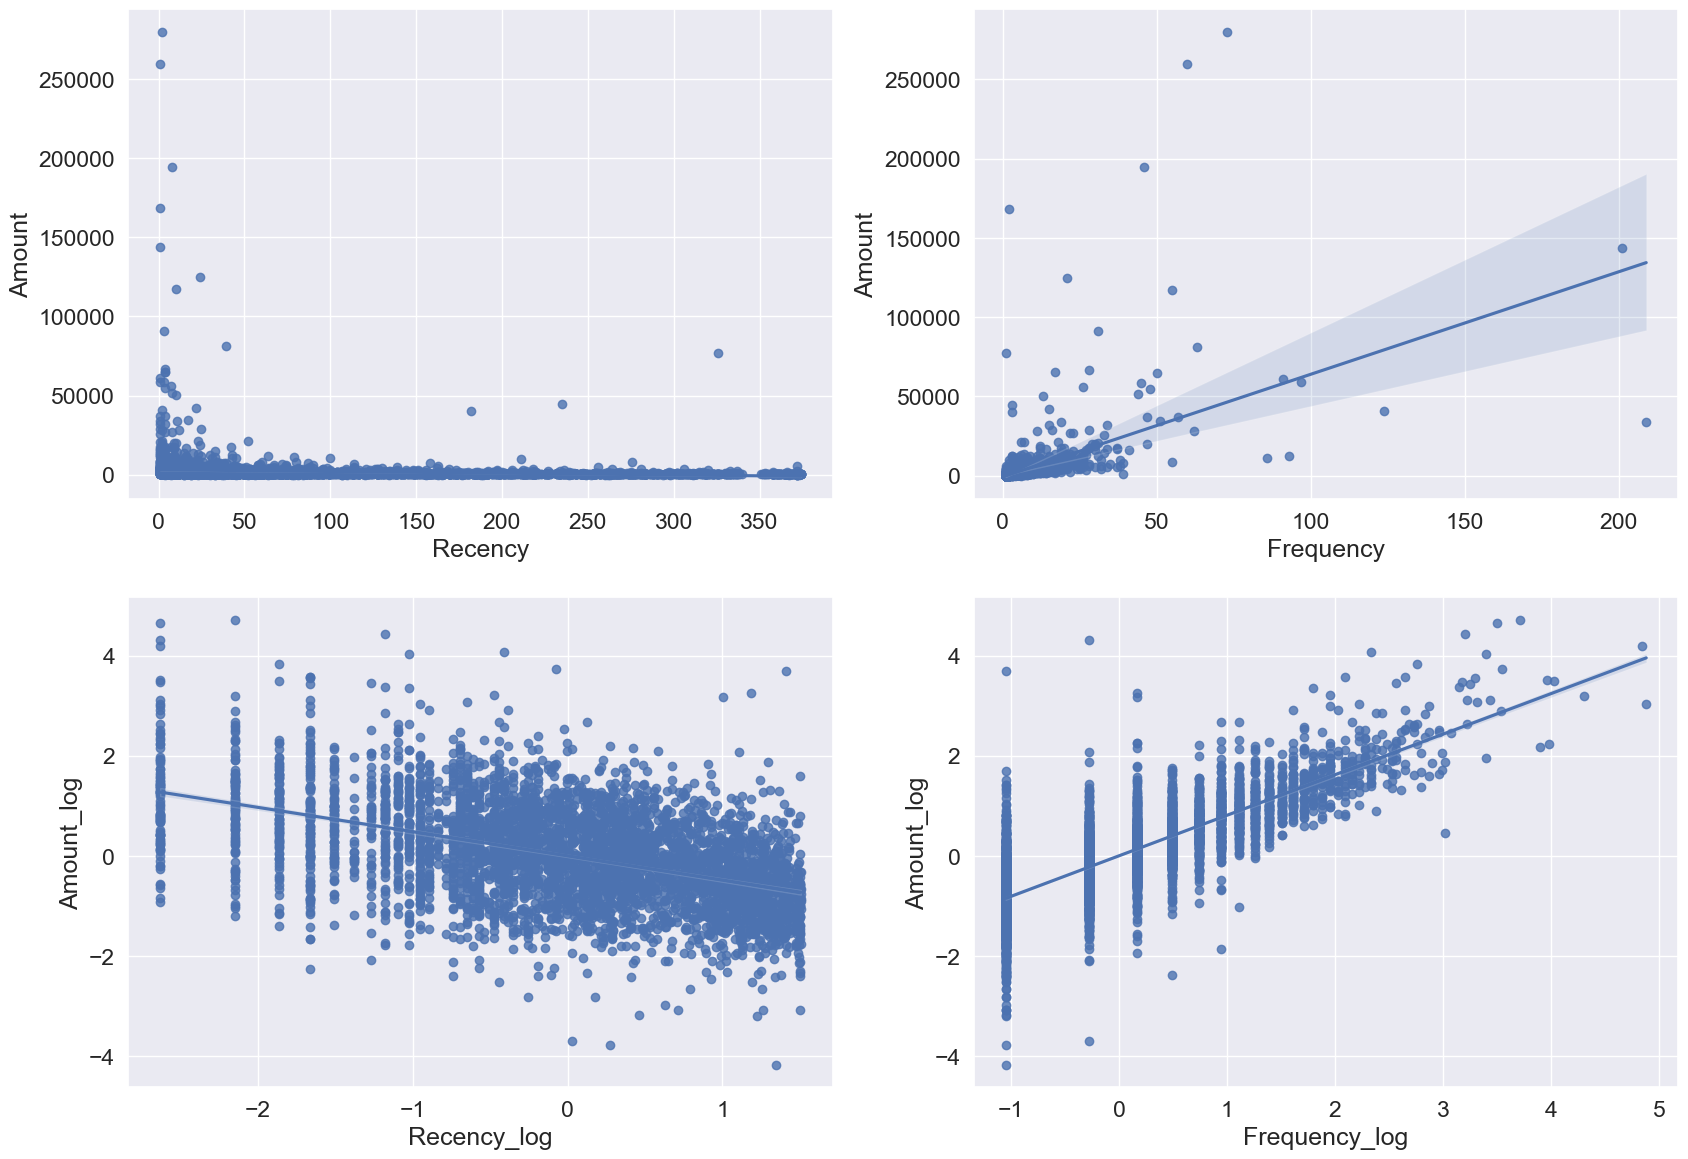

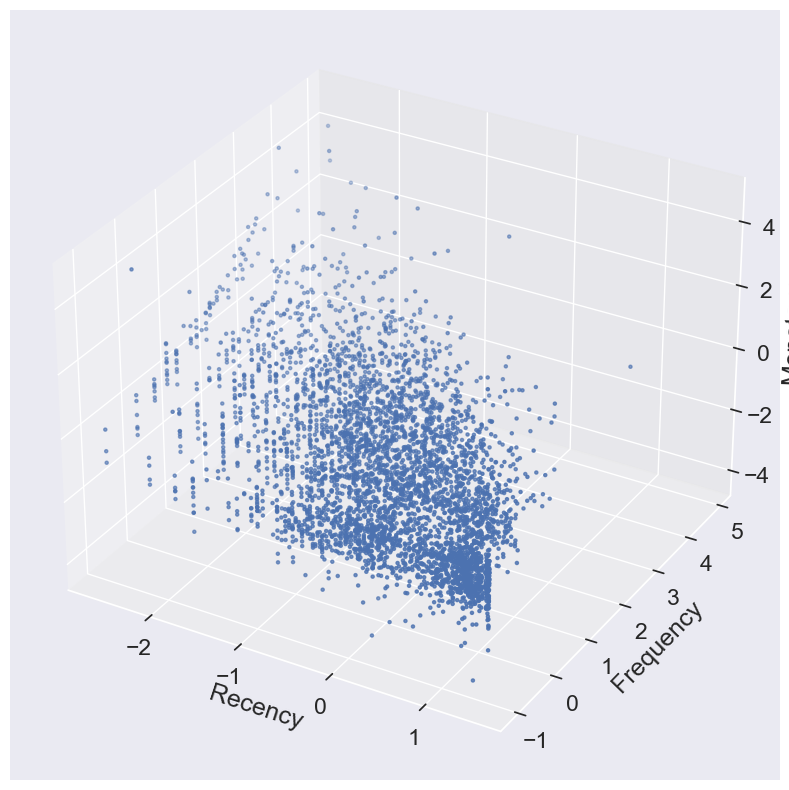

In [41]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='Recency', y='Amount', data=data)
f1 = fig.add_subplot(222); sns.regplot(x='Frequency', y='Amount', data=data)
f1 = fig.add_subplot(223); sns.regplot(x='Recency_log', y='Amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='Frequency_log', y='Amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.Recency_log
ys = customer_history_df.Frequency_log
zs = customer_history_df.Amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

# 4. Modeling - Kmean

Phương pháp Elbow:
Sử dụng phương pháp khuỷu tay (Elbow) để tìm số lượng cụm tối ưu. Ý tưởng đằng sau phương pháp khuỷu tay là xác định giá trị của k tại đó độ gấp khúc bắt đầu tăng nhanh nhất. Nếu k tăng, độ biến dạng của các cụm sẽ giảm, bởi vì các mẫu sẽ gần với trọng tâm cụm.

Phương pháp này xem xét phần trăm phương sai được giải thích như một hàm của số lượng cụm. Chính xác hơn, nếu ta vẽ biểu đồ phần trăm phương sai được giải thích bởi các cụm so với số lượng các cụm, các cụm đầu tiên sẽ bổ sung nhiều thông tin (giải thích nhiều phương sai), nhưng tại một số điểm, mức tăng cận biên sẽ giảm xuống (Số lượng cụm tăng, phương sai giảm), tạo ra một góc trong đồ thị, đây sẽ là điểm chọn số lượng cho cụm, do đó có "tiêu chí khuỷu tay". Phần trăm phương sai được giải thích là tỷ lệ giữa phương sai giữa nhóm với tổng phương sai, còn được gọi là F-test. Một biến thể nhỏ của phương pháp này vẽ biểu đồ độ cong của phương sai trong cụm



# Yêu cầu 14: Thực hiện đoạn mã bên dưới với X_scaled chính là dữ liệu sau khi chuẩn hoá, X_scaled sẽ có chiều như sau: (4338, 3)

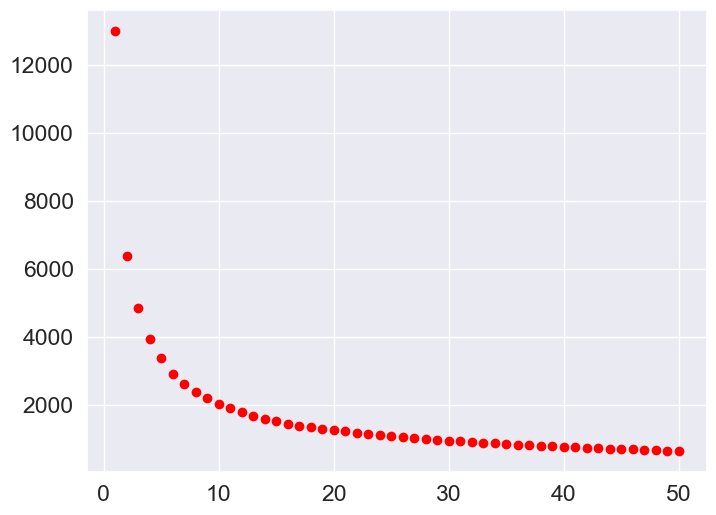

The best K sugest:  7


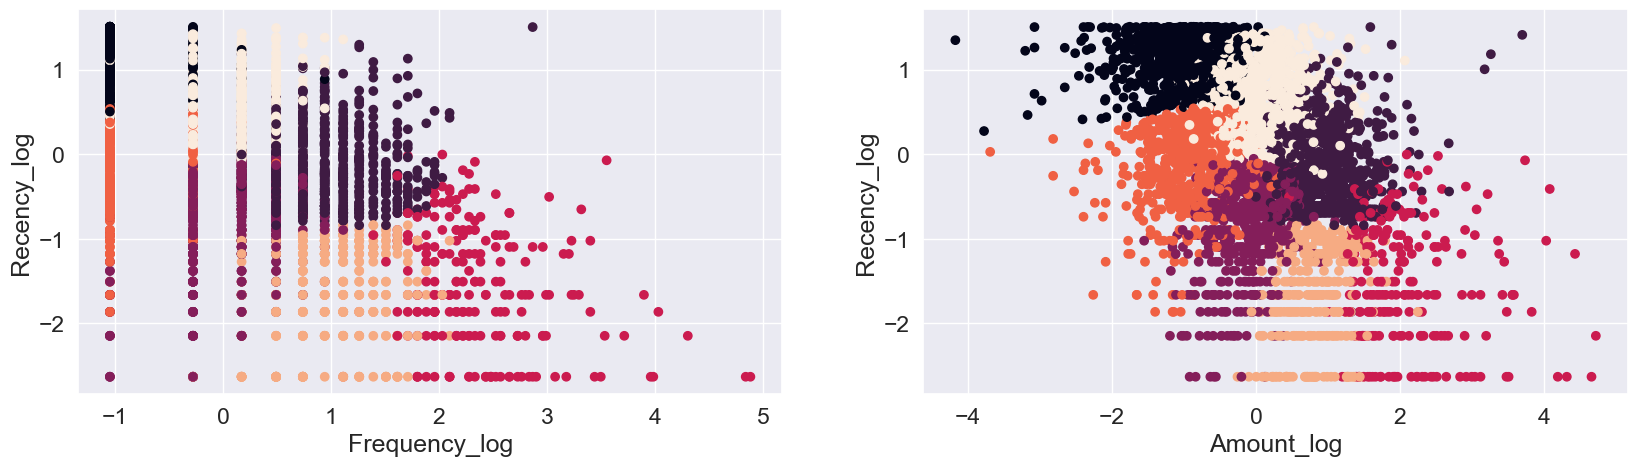

In [42]:
# Assuming customer_history_df contains scaled data suitable for K-Means
# Adjust based on your DataFrame structure
X_scaled = customer_history_df.values

# Column names for plotting
feature_vector = customer_history_df.columns  # Use column names from your DataFrame

cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

# Yêu cầu 15: Chạy thành công đoạn mã bên dưới:

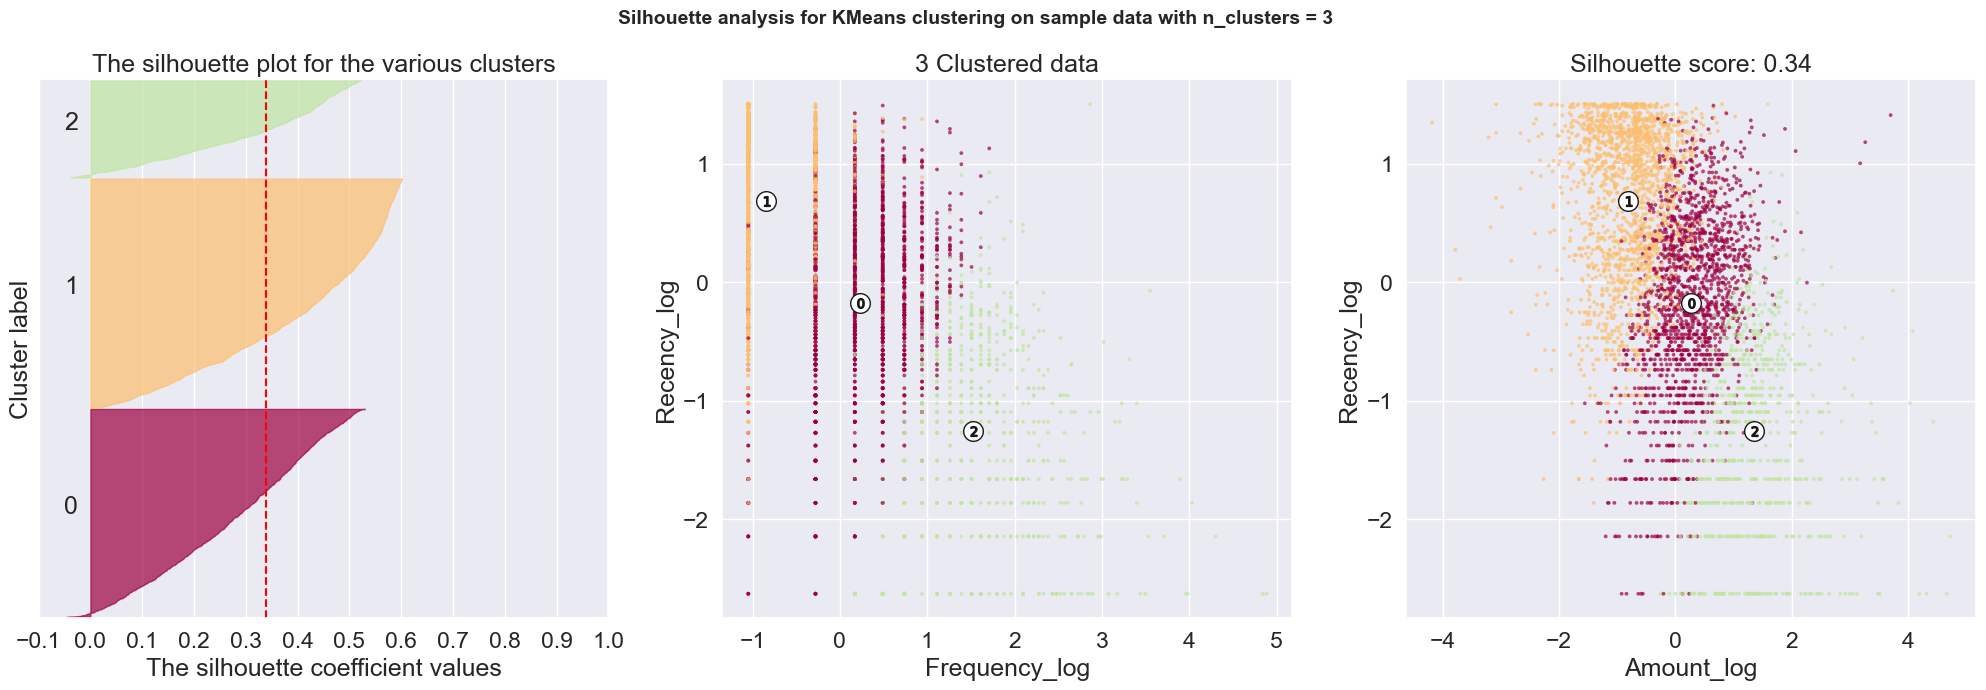

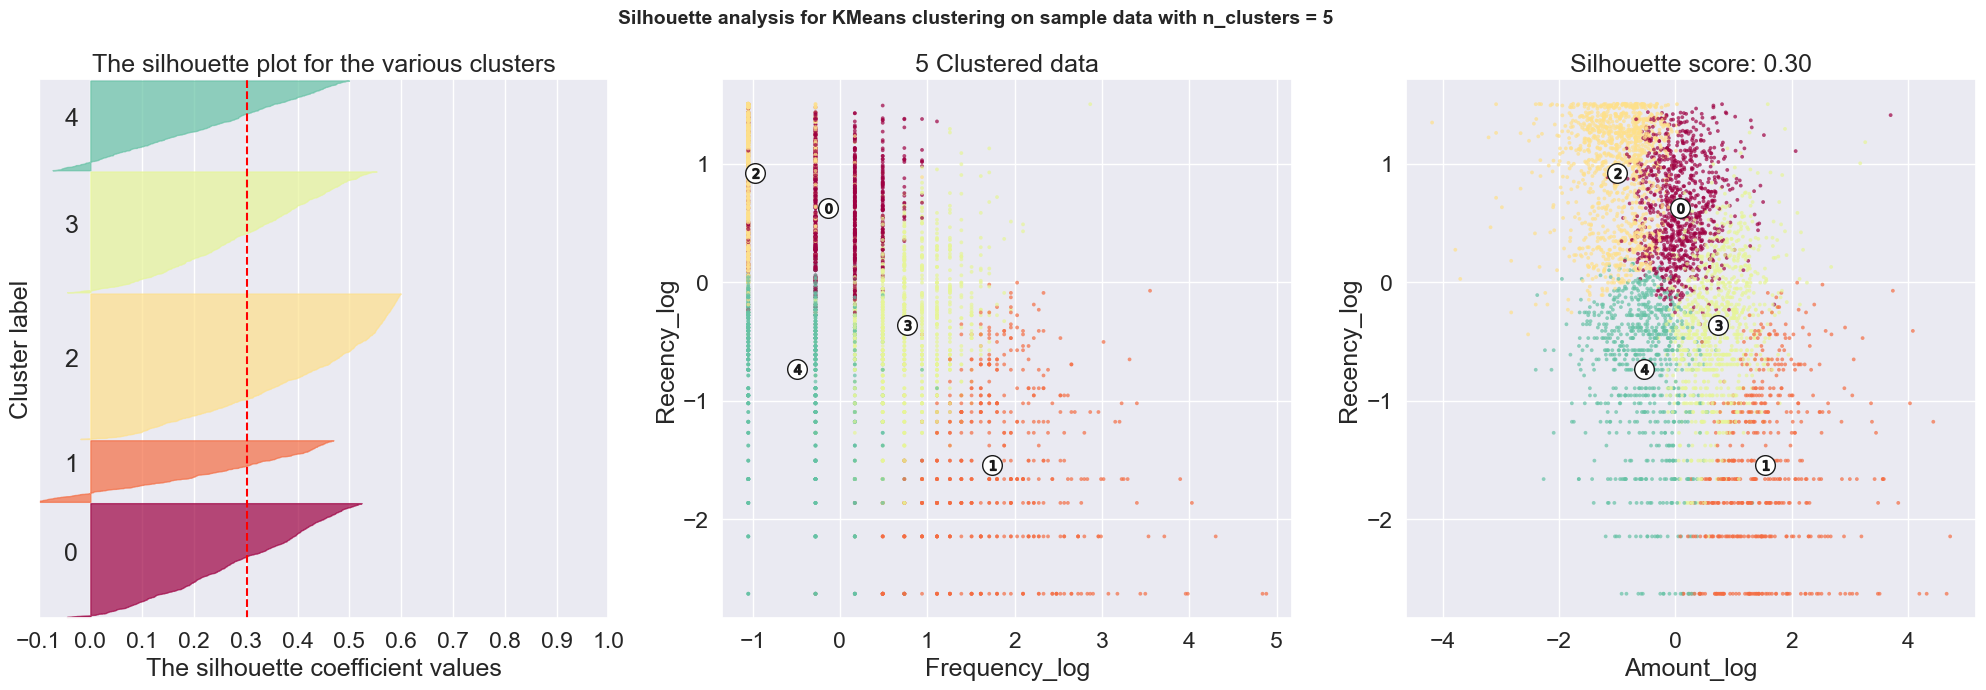

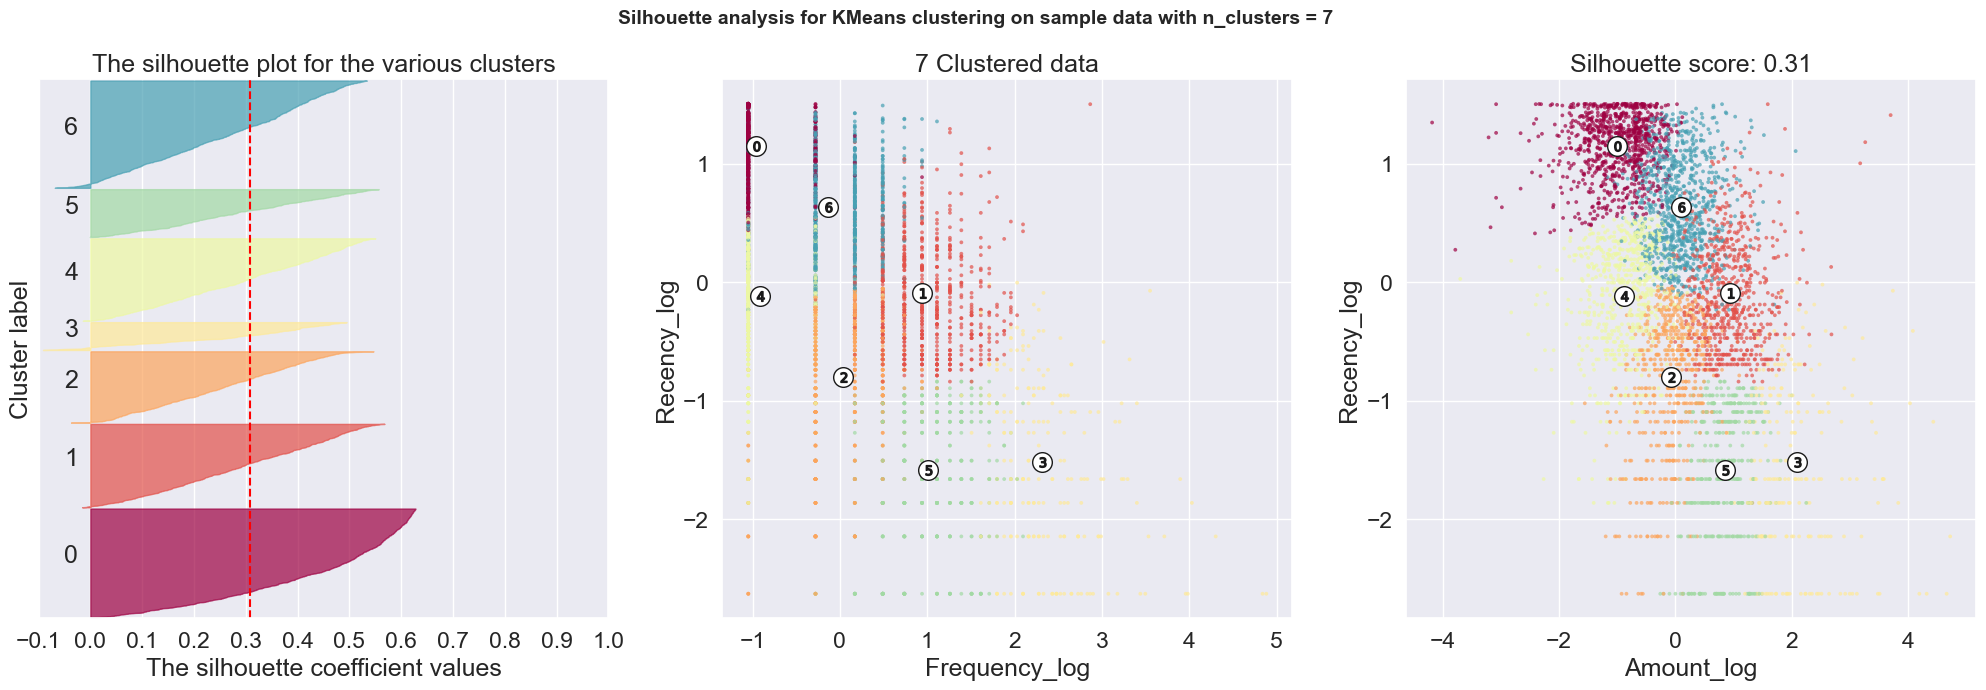

In [43]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

# Yêu cầu 16: Từ hình ảnh trực quan ở yêu cầu 15 hãy đưa ra một số nhận xét chung

# Clusters Center

**Nhận xét chung**: 
Khi n_Cluster = 3 khi chọn K = 3, ta nhận thấy được đường đỏ sọc của k=3 là đường giá trị Silhouette score trung bình. 
Nhận thấy chia được 3 cụm như sau:

    Cụm 3, cụm 5, cụm 7: Ta thấy việc phân cụm khá là đồng đều khi giá trị Maximum đều (lớn hơn ) hoặc có thể nói vượt qua đường trung bình của giá trị Silhouette Score trung bình(đường sọc đỏ).
    
    --> Tóm lại với cụm K=3 ta nhận được điểm Silhouette Score với Kết Quả là 0.34 lớn hơn 2 cụm còn lại là cụm 5 & cụm 7 với phân phối điểm Silhouette Score là 0.30, 0.31.  
    
Explain Bonus: Giá trị Silhouette Score càng lớn càng tốt.

Silhouette Score được sử dụng để đánh giá chất lượng của việc phân cụm (clustering). Giá trị này dao động từ -1 đến 1:

Giá trị gần 1: Các điểm dữ liệu được phân cụm tốt và rất gần với cụm của chúng, đồng thời cách xa các cụm khác.
Giá trị gần 0: Các điểm dữ liệu nằm trên biên giới giữa các cụm.
Giá trị gần -1: Các điểm dữ liệu có thể bị phân cụm sai, tức là chúng gần với các cụm khác hơn là với cụm của chúng.
Do đó, khi tính toán Silhouette Score, giá trị càng cao thì chất lượng phân cụm càng tốt.

# Yêu cầu 17: Chạy thành công đoạn mã bên dưới để hiển thị các tâm cụm

In [34]:
features = ['Amount',  'Recency',  'Frequency']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.34
Centers of each cluster:
       Amount    Recency    Frequency
0   33.637514   3.171771  1019.114007
1  115.772727   1.196009   262.853859
2    7.173427  10.099071  3983.322212
--------------------------------------------------
for 5 clusters the silhouette score is 0.30
Centers of each cluster:
       Amount    Recency    Frequency
0  105.524342   2.279822   813.621211
1    4.728829  12.403678  5051.937209
2  162.151056   1.075721   208.013492
3   25.873099   5.126046  1830.850445
4   15.050233   1.644625   366.981282
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
       Amount    Recency     Frequency
0  225.646442   1.084052    205.487848
1   37.751906   6.002805   2401.476039
2   13.675696   2.647270    657.936736
3    4.926439  20.646017  10143.118638
4   36.717710   1.130641    239.411000
5    4.458579   6.365225   2114.266897
6  107.556965   2.277767    814.574493

# Yêu cầu 18: Phân tích với từng K

# Trường hợp có 3 cluster:

In [35]:
features = ['Amount',  'Recency',  'Frequency']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.34
Centers of each cluster:
       Amount    Recency    Frequency
0   33.637514   3.171771  1019.114007
1  115.772727   1.196009   262.853859
2    7.173427  10.099071  3983.322212
--------------------------------------------------
for 5 clusters the silhouette score is 0.30
Centers of each cluster:
       Amount    Recency    Frequency
0  105.524342   2.279822   813.621211
1    4.728829  12.403678  5051.937209
2  162.151056   1.075721   208.013492
3   25.873099   5.126046  1830.850445
4   15.050233   1.644625   366.981282
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
       Amount    Recency     Frequency
0  225.646442   1.084052    205.487848
1   37.751906   6.002805   2401.476039
2   13.675696   2.647270    657.936736
3    4.926439  20.646017  10143.118638
4   36.717710   1.130641    239.411000
5    4.458579   6.365225   2114.266897
6  107.556965   2.277767    814.574493

# Với các ô và tâm ở các đơn vị chính xác, chúng ta hãy xem một số thông tin chi tiết theo từng nhóm cụm:
Trường hợp có 3 cluster:

Khi n_Cluster = 3 khi chọn K = 3, ta nhận thấy được đường đỏ sọc của k=3 là đường giá trị Silhouette score trung bình.

Đối với Cụm 3:

.Ta thấy việc phân cụm khá là đồng đều khi giá trị Maximum đều (lớn hơn ) hoặc có thể nói vượt qua đường trung bình của giá trị Silhouette Score trung bình(đường sọc đỏ).

.Cụm K=3 ta nhận được điểm Silhouette Score với Kết Quả là 0.34.

# Trường hợp có 5 cluster:

In [36]:
features = ['Amount',  'Recency',  'Frequency']
for i in range(5,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 5 clusters the silhouette score is 0.30
Centers of each cluster:
       Amount    Recency    Frequency
0  105.524342   2.279822   813.621211
1    4.728829  12.403678  5051.937209
2  162.151056   1.075721   208.013492
3   25.873099   5.126046  1830.850445
4   15.050233   1.644625   366.981282
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
       Amount    Recency     Frequency
0  225.646442   1.084052    205.487848
1   37.751906   6.002805   2401.476039
2   13.675696   2.647270    657.936736
3    4.926439  20.646017  10143.118638
4   36.717710   1.130641    239.411000
5    4.458579   6.365225   2114.266897
6  107.556965   2.277767    814.574493
--------------------------------------------------


# Nhận xét khi trường hợp có 5 cluster:
Khi n_Cluster = 5 khi chọn K = 5, ta nhận thấy được đường đỏ sọc của k=5 là đường giá trị Silhouette score trung bình.

Đối với Cụm 5:

.Ta thấy việc phân cụm khá là đồng đều khi giá trị Maximum đều (lớn hơn ) hoặc có thể nói vượt qua đường trung bình của giá trị Silhouette Score trung bình(đường sọc đỏ).

.Cụm K=3 ta nhận được điểm Silhouette Score với Kết Quả là 0.30.

=> Kết quả nhỏ nhất so với cụm 3, cụm 7.

# Trường hợp có 7 cluster:

In [37]:
features = ['Amount',  'Recency',  'Frequency']
for i in range(7,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 7 clusters the silhouette score is 0.31
Centers of each cluster:
       Amount    Recency     Frequency
0  225.646442   1.084052    205.487848
1   37.751906   6.002805   2401.476039
2   13.675696   2.647270    657.936736
3    4.926439  20.646017  10143.118638
4   36.717710   1.130641    239.411000
5    4.458579   6.365225   2114.266897
6  107.556965   2.277767    814.574493
--------------------------------------------------


# Nhận xét khi trường hợp có 3 cluster:

Khi n_Cluster = 7 khi chọn K = 7, ta nhận thấy được đường đỏ sọc của k=7 là đường giá trị Silhouette score trung bình.

Đối với Cụm 7:

.Ta thấy việc phân cụm khá là đồng đều khi giá trị Maximum đều (lớn hơn ) hoặc có thể nói vượt qua đường trung bình của giá trị Silhouette Score trung bình(đường sọc đỏ).

.Cụm K=7 ta nhận được điểm Silhouette Score với Kết Quả là 0.31.

=> Nhận thấy điểm cũng khá là tốt khi nằm ở mức 2 so với 2 cụm còn lại.

# Tìm hiểu sâu về các cụm:

# Yêu cầu 19: Viết mã để trực quan hoá tỷ lệ khách hàng trong từng cụm ứng với mỗi K

Khi chúng ta đã gán nhãn cho từng khách hàng, nhiệm vụ tiếp theo khá đơn giản. Bây giờ chúng ta sẽ hiểu một cách tóm tắt về khách hàng trong mỗi nhóm khác nhau như thế nào. Nếu có thể hình dung thông tin này, chúng ta sẽ có thể tìm ra sự khác biệt trong các nhóm khách hàng và từ đó có thể sửa đổi chiến lược bán hàng marketing trên cơ sở những khác biệt đó.

In [76]:
#Tiến hành dán nhãn cho các CustomerID
customer_history_df['Cluster'] = model.labels_
customer_history_df

,Recency_log,Frequency_log,Amount_log,Cluster
0,1.409894,-1.048610,3.698719,1
1,-2.146498,1.111836,1.410201,3
2,0.383971,0.490522,0.716419,1
3,-0.574674,-1.048610,0.698706,4
4,1.374758,-1.048610,-0.617446,2
...,...,...,...,...
4333,1.298690,-1.048610,-1.106086,2
4334,0.999081,-1.048610,-1.743850,2
4335,-1.178605,-0.279044,-1.117365,4
4336,-1.662552,2.029655,0.837969,3


For 3 clusters the silhouette score is 0.34
Centers of each cluster:
       Amount    Recency    Frequency
0   33.637514   3.171771  1019.114007
1  115.772727   1.196009   262.853859
2    7.173427  10.099071  3983.322212
--------------------------------------------------
For 5 clusters the silhouette score is 0.30
Centers of each cluster:
       Amount    Recency    Frequency
0  105.524342   2.279822   813.621211
1    4.728829  12.403678  5051.937209
2  162.151056   1.075721   208.013492
3   25.873099   5.126046  1830.850445
4   15.050233   1.644625   366.981282
--------------------------------------------------
For 7 clusters the silhouette score is 0.31
Centers of each cluster:
       Amount    Recency     Frequency
0  225.646442   1.084052    205.487848
1   37.751906   6.002805   2401.476039
2   13.675696   2.647270    657.936736
3    4.926439  20.646017  10143.118638
4   36.717710   1.130641    239.411000
5    4.458579   6.365225   2114.266897
6  107.556965   2.277767    814.574493

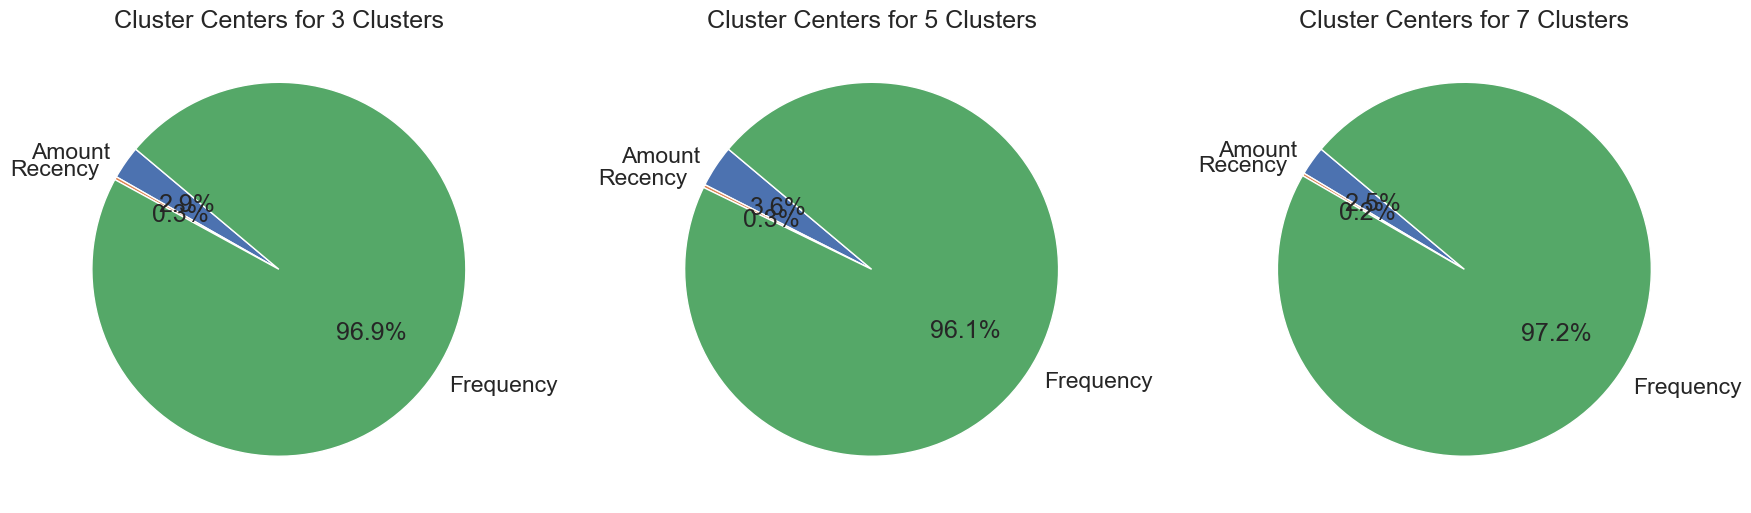

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dữ liệu mẫu
features = ['Amount', 'Recency', 'Frequency']
K_best = 7  # Thay đổi giá trị này tùy theo số lượng cụm tối ưu bạn muốn

# Giả định cluster_centers và scaler đã được định nghĩa
# cluster_centers là dictionary chứa thông tin các cụm với keys là số lượng cụm (i.e., 3, 5, 7, ...)
# scaler là đối tượng chuẩn hóa

# Tạo một figure với ba biểu đồ tròn
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, k in enumerate(range(3, K_best + 1, 2)):
    # In thông tin
    print(f"For {k} clusters the silhouette score is {cluster_centers[k]['silhouette_score']:.2f}")
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[k]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed), columns=features))
    print('-' * 50)
    
    # Vẽ biểu đồ tròn cho các trung tâm cụm
    cluster_center_df = pd.DataFrame(np.exp(cent_transformed), columns=features)
    axs[i].pie(cluster_center_df.mean(), labels=features, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Cluster Centers for {k} Clusters')

plt.tight_layout()
plt.show()

In [80]:
from sklearn.cluster import KMeans

# Create and fit the KMeans model with n_init explicitly set
model = KMeans(n_clusters=7, n_init=10, random_state=42)
model.fit(customer_history_df)

KMeans(n_clusters=7, n_init=10, random_state=42)

In [86]:
# Combine the original and transformed DataFrames
combined_df = pd.concat([data, customer_history_df], axis=1)

# Display the combined DataFrame
combined_df.head()

,Recency,Frequency,Amount,Recency_log,Frequency_log,Amount_log
0,326,1,77183.60,1.409894,-1.048610,3.698719
1,2,7,4310.00,-2.146498,1.111836,1.410201
2,75,4,1797.24,0.383971,0.490522,0.716419
3,19,1,1757.55,-0.574674,-1.048610,0.698706
4,310,1,334.40,1.374758,-1.048610,-0.617446


In [87]:
#Tiến hành dán nhãn cho các CustomerID
combined_df['Cluster'] = model.labels_
combined_df

,Recency,Frequency,Amount,Recency_log,Frequency_log,Amount_log,Cluster
0,326,1,77183.60,1.409894,-1.048610,3.698719,4
1,2,7,4310.00,-2.146498,1.111836,1.410201,3
2,75,4,1797.24,0.383971,0.490522,0.716419,4
3,19,1,1757.55,-0.574674,-1.048610,0.698706,6
4,310,1,334.40,1.374758,-1.048610,-0.617446,2
...,...,...,...,...,...,...,...
4333,278,1,180.60,1.298690,-1.048610,-1.106086,2
4334,181,1,80.82,0.999081,-1.048610,-1.743850,2
4335,8,2,178.05,-1.178605,-0.279044,-1.117365,6
4336,4,16,2094.88,-1.662552,2.029655,0.837969,3


In [63]:
combined_df.rename(columns={'Amount': 'Monetary'}, inplace=True)

In [70]:
combined_df.groupby('Cluster').agg(
    {
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
    }
).round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,7.97,25.00,18318.02
1,47.28,6.53,3041.46
2,240.24,1.12,249.48
3,5.77,6.90,2398.04
4,17.33,2.83,748.56
5,126.68,2.48,960.17
6,43.67,1.18,283.09


# Yêu cầu 20: Trực quan hoá số tiền khách hàng đã mua hàng trong từng cụm ứng với mỗi K, sau đó đưa ra nhận xét

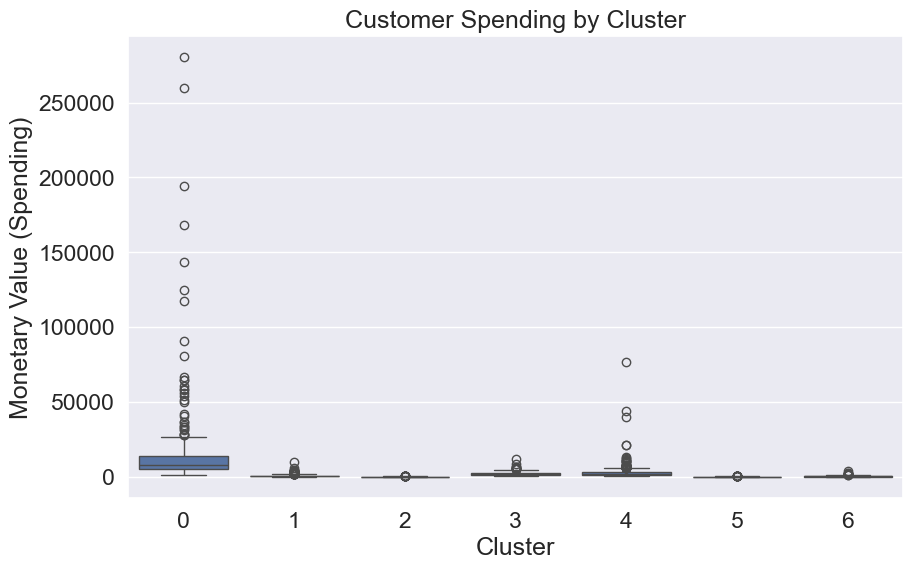

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df is already defined and contains the relevant data

# Creating the Boxplot for the 'Amount' column by 'Cluster'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Amount', data=combined_df)

# Add title and labels
plt.title('Customer Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value (Spending)')

# Show the plot
plt.show()